<center><br><font size=10>Final Project</font><br>
<br><br>
<b>Introduction to Machine Learning – Digital Sciences for High-Tech</b>
<br><br>
<b>Author</b>: Asaf Biniamini & Guy Maoz
<br><i>Spring 2023</i> </center>

<center>
<font size=6>pre-processing</font>
</center>

## Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from typing import List, Dict
from scipy import stats
import time
%matplotlib inline

In [15]:
# Configurable parameters
iqr_value = 2

1. Are there outliers in the data? If so, you must remove them or at least give explanation about it.

To determine if there are outliers in the data, we did the next steps:

a. Explore the data: Begin by gaining a general understanding of the data by examining its summary statistics, such as mean, median, standard deviation, minimum, and maximum values. This will give us a rough idea of the range and distribution of our features.

b. Visualize the data: Create visualizations like histograms, box plots, or scatter plots to visually identify any potential outliers. These plots can help us identify data points that deviate significantly from the majority of the data.

c. Analyze feature distributions: Examine the distribution of each feature individually to identify any unusual patterns or extreme values. Outliers can be identified as data points that fall far outside the range of the bulk of the data.

d. Use statistical techniques: Apply statistical methods like the Z-score or the interquartile range (IQR) to detect outliers. The Z-score measures how many standard deviations a data point is away from the mean, while the IQR measures the spread of data around the median. Data points that fall outside a certain threshold (e.g., 3 standard deviations for Z-score or 1.5 times the IQR) can be considered outliers.

Once we have identified the outliers, we have a few options:

Remove the outliers: If the outliers are due to measurement errors or data entry mistakes, we can choose to remove them from the dataset.

Transform the data: Instead of removing outliers, we can apply data transformation techniques like winsorization or log transformation to mitigate the impact of outliers on our model.

Treat outliers as a separate category: In some cases, outliers may contain valuable information or represent rare events. If that's the case, we can create a separate category or flag for outliers to be included in our analysis.


Summary statistics:
               size         vsize       imports       exports     has_debug  \
count  6.000000e+04  5.806500e+04  58261.000000  57907.000000  57073.000000   
mean   1.501019e+06  1.965704e+06    106.195671     30.803271      0.403764   
std    4.727391e+06  2.017881e+07    213.452315    508.079533      0.490655   
min    2.980000e+02  5.440000e+02      0.000000      0.000000      0.000000   
25%    1.070080e+05  1.228800e+05      1.000000      0.000000      0.000000   
50%    4.833280e+05  4.218880e+05     28.000000      0.000000      0.000000   
75%    1.239326e+06  1.601536e+06    152.000000      0.000000      1.000000   
max    3.253537e+08  4.278288e+09  15047.000000  48840.000000      1.000000   

       has_relocations  has_resources  has_signature       has_tls  \
count     56676.000000   58039.000000   58063.000000  57102.000000   
mean          0.543069       0.860456       0.254189      0.234195   
std           0.498146       0.346516       0.435408      

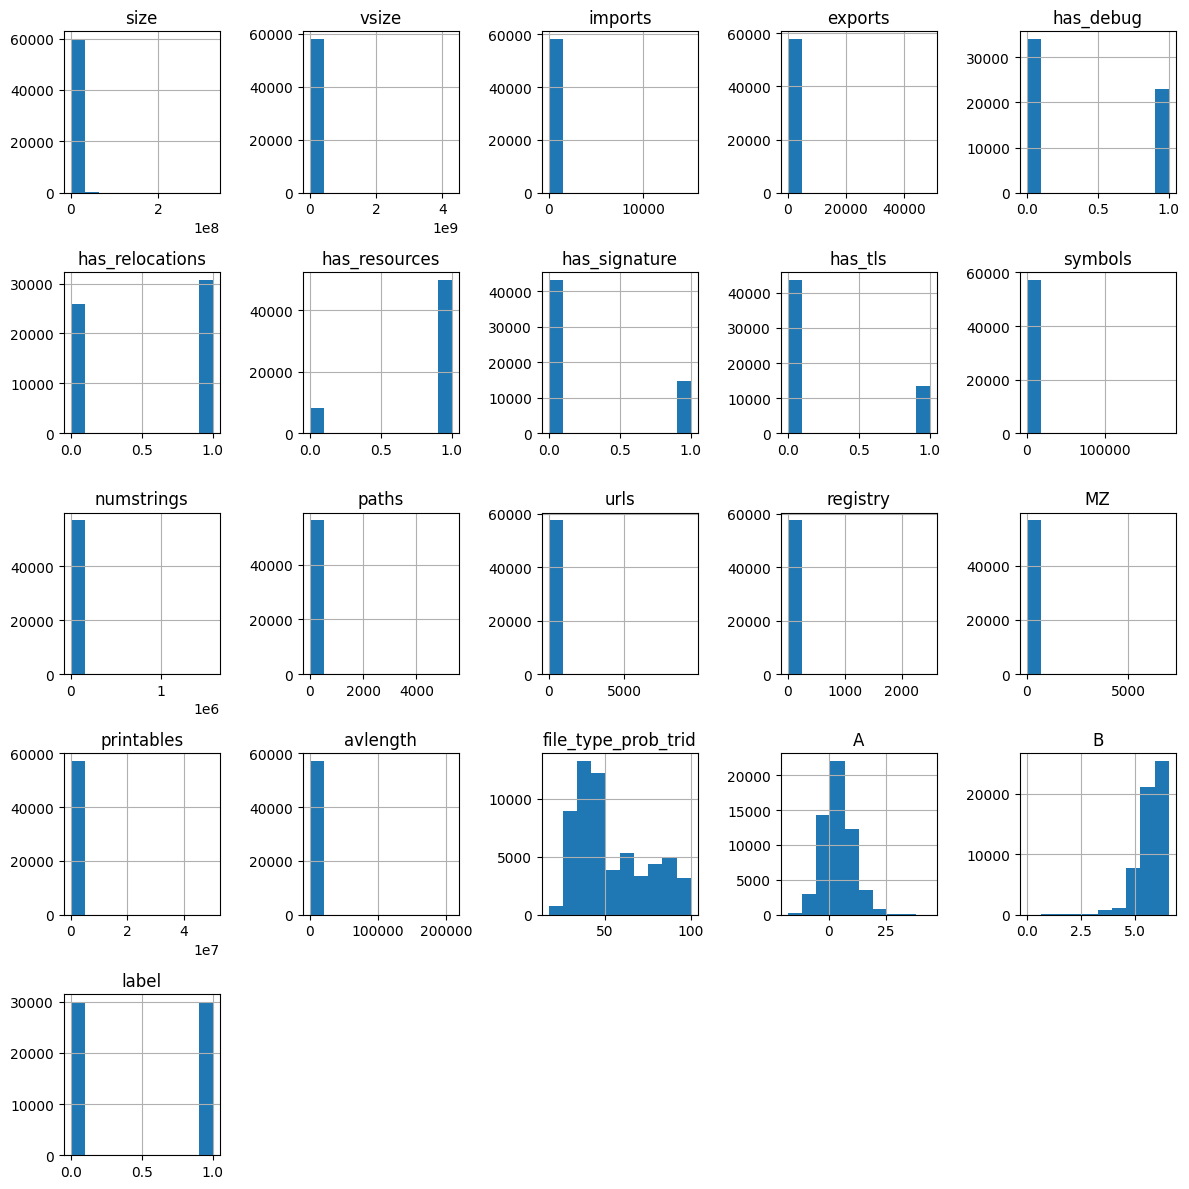

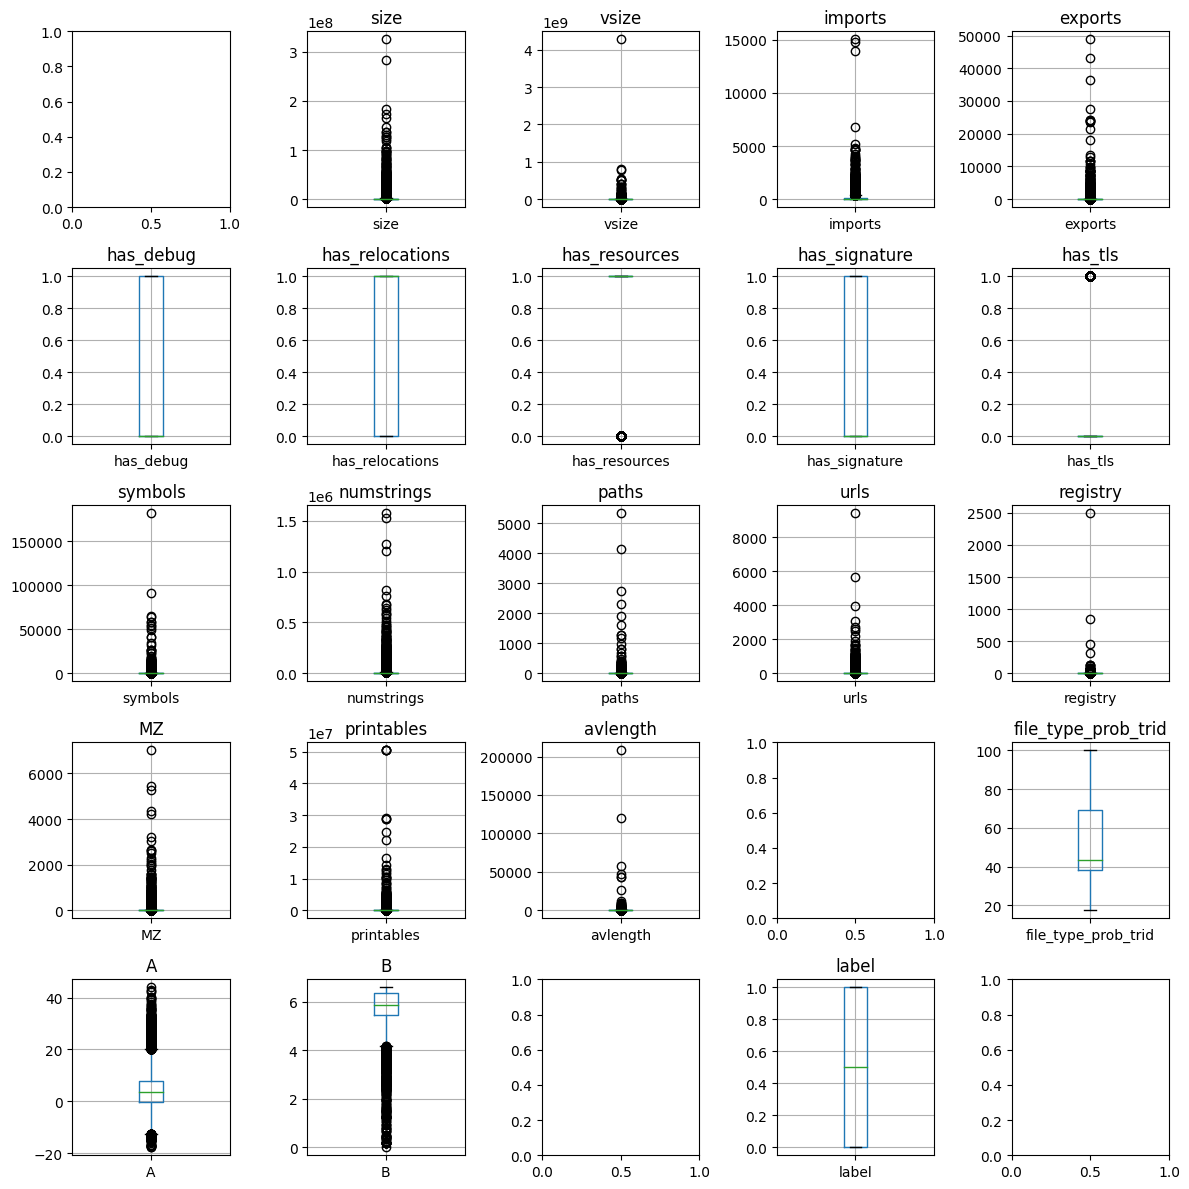

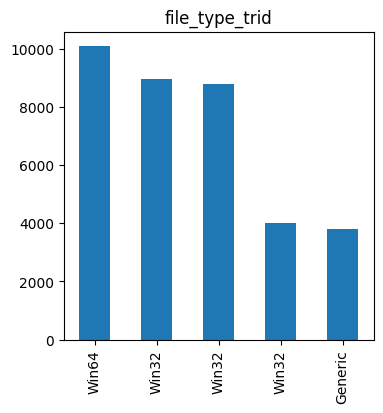

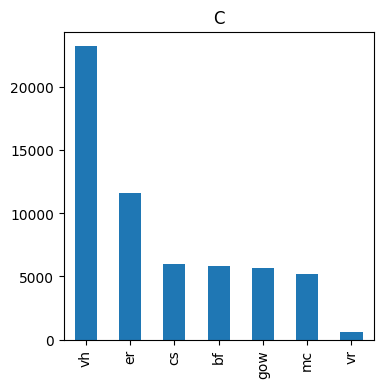

Number of outliers detected: 34363
Number of data points after handling outliers: 25637
Runtime: 6.68 seconds


In [16]:
t0 = time.time() # for Runtime measurement

# Load the data
data = pd.read_csv("train.csv")
X, y = data.values[:, :-1], data.values[:, -1]

# Step 1: Explore the data
print("Summary statistics:")
print(data.describe())

# Step 2: Visualize the data
data.drop(["sha256", "file_type_trid", "C"], axis=1).hist(figsize=(12, 12))
plt.tight_layout()
plt.show()
 
# Step 3: Analyze feature distributions
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    if column != "sha256" and column != "file_type_trid" and column != "C":
        data.boxplot(column=[column], ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")
        
plt.tight_layout()
plt.show()
        
        
feature_file_type_trid_counts = data["file_type_trid"].value_counts()
top_categories = feature_file_type_trid_counts[:5]
top_categories.index = top_categories.index.str.split().str[0]  # Extracting the first word of each string
top_categories.plot(kind="bar", figsize=(4, 4))
plt.title("file_type_trid")
plt.show()



feature_C_counts = data["C"].value_counts()
feature_C_counts.plot(kind="bar", figsize=(4, 4))
plt.title("C")
plt.show()

# Step 4: Use statistical techniques (IQR method)
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_columns].copy()

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - iqr_value * IQR
upper_threshold = Q3 + iqr_value * IQR

outliers = ((numeric_data < lower_threshold) | (numeric_data > upper_threshold)).any(axis=1)

# Remove outliers
clean_data = data[~outliers]

# Print the number of outliers detected
num_outliers = outliers.sum()
print("Number of outliers detected:", num_outliers)

# Print the number of data points after handling outliers
num_data_points = len(clean_data)
print("Number of data points after handling outliers:", num_data_points)



'''
# Step 4: Use statistical techniques (Z-score)
z_scores = np.abs(stats.zscore(X))
threshold = 3  # Set your threshold for outliers here
outliers = np.where(z_scores > threshold)

# Step 5: Handle outliers
# Remove outliers
clean_X = X[(z_scores < threshold).all(axis=1)]
clean_y = y[(z_scores < threshold).all(axis=1)]

# Transform outliers (Winsorization)
winsorized_X = np.where(z_scores > threshold, np.sign(X) * threshold, X)

# Print the number of outliers detected
print("Number of outliers detected:", len(outliers[0]))

# Print the number of data points after handling outliers
print("Number of data points after handling outliers:", len(clean_X))
'''

print(f'Runtime: {round(time.time()-t0,2)} seconds')

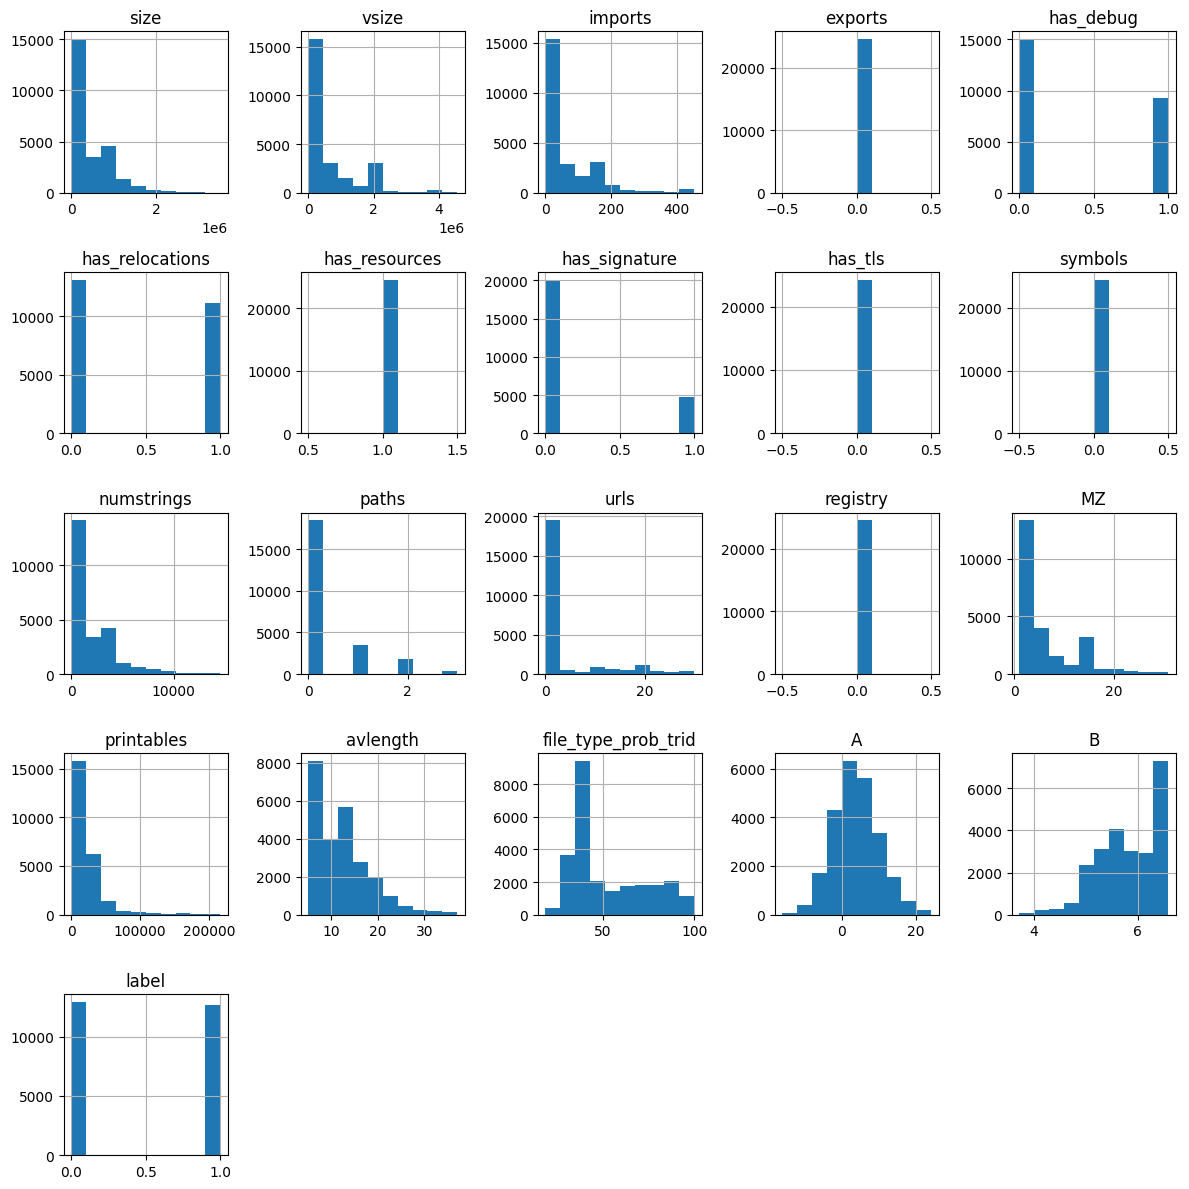

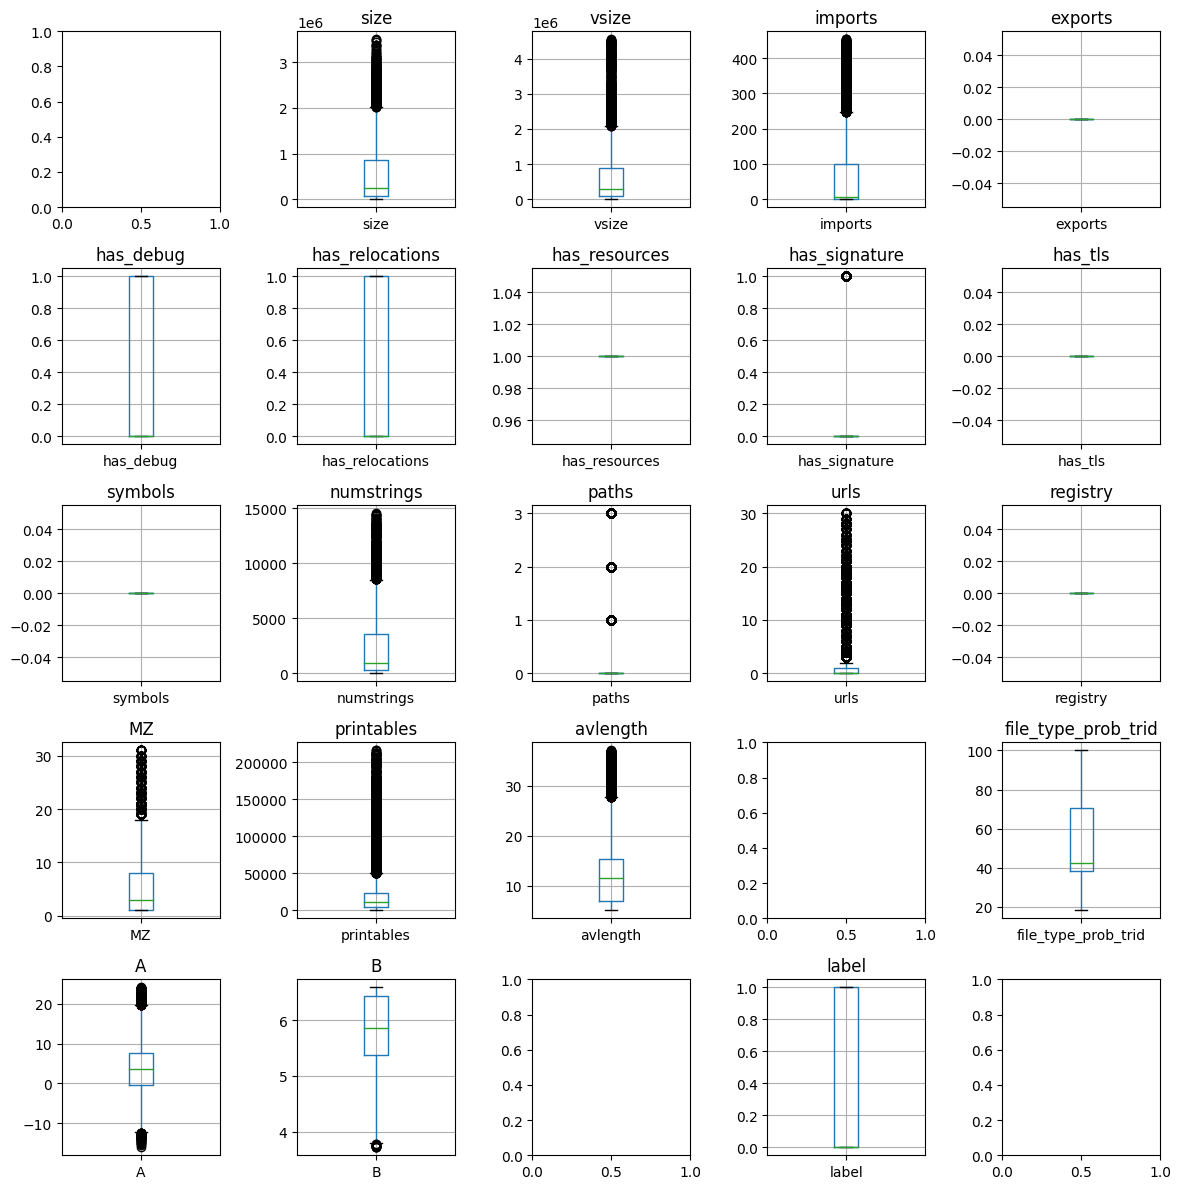

In [17]:
# Step 5: Visualize the data after removing outliers
clean_data.drop(["sha256", "file_type_trid", "C"], axis=1).hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(clean_data.columns):
    if column != "sha256" and column != "file_type_trid" and column != "C":
        clean_data.boxplot(column=[column], ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_ylabel("")
        axes[i].set_xlabel("")

plt.tight_layout()
plt.show()


we choose to use the IQR

2. Is the data normalized? If not - should they be normalized? What is the importance of normalizing the data in the problem?

Normalization is the process of scaling numeric features to a standard range, typically between 0 and 1 or -1 and 1. Here are a few reasons why normalization is important in machine learning problems:

Equalizes the scales: Different features might have different scales, which can affect the performance of certain machine learning algorithms. By normalizing the data, we bring all features to a similar scale, ensuring that they contribute equally during the model training process.

Avoids dominance of certain features: When features have significantly different scales, those with larger scales can dominate the learning process and overshadow the influence of other features. Normalization prevents this dominance, allowing all features to contribute more equally to the model's learning process.

Improves convergence: Many optimization algorithms used in machine learning, such as gradient descent, converge faster on normalized data. Normalization helps to avoid oscillations and overshooting in the optimization process, leading to quicker convergence and more stable models.

Facilitates interpretation and comparison: Normalized data is easier to interpret and compare. The values are on a consistent scale, making it simpler to understand the impact of different features and compare their relative importance in the model.

In summary, normalizing the data can help improve the performance, stability, and interpretability of machine learning models by equalizing feature scales, avoiding dominance, facilitating convergence, and simplifying interpretation and comparison of feature importance.

In [18]:
# Select the features to be normalized
features_to_normalize = clean_data.columns.drop(["sha256", "file_type_trid", "C"])

# Create a copy of the original DataFrame
data_normalized = clean_data.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize only the selected features
data_normalized[features_to_normalize] = scaler.fit_transform(data_normalized[features_to_normalize])

# Print the normalized DataFrame
print(data_normalized)


                                                  sha256      size     vsize  \
1      ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...  0.006090  0.009739   
4      59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...  0.113046  0.092486   
5      04c28622a87150c4760ccd9801d378c6e96373099bbe02...  0.123880  0.098782   
9      f2b1a50f1c0088e56abc87c58fb7fb949f8bc0c69d406d...  0.003749  0.008840   
10     0891f16066861dd46c2f0af60c13df7d6bddcdefd9a662...  0.002140  0.007041   
...                                                  ...       ...       ...   
59991  cd5e0bdab908b20cb5cb22c6a3b6572722ee2f7b58a7a7...  0.013529  0.047515   
59992  1ef1b3c78403e2dbe7d0313793e5ef0e8f08bd5c4e5bfd...  0.030964  0.027727   
59995  4511a131862a42b993277500b69e1694501873fc9504e5...  0.274421  0.454952   
59998  7ea972b22a4aa8f1ccf454279cafc69b0431e82be568a9...  0.031307  0.023230   
59999  7dc9c3c1035a77fa45371b50a1a4dfec995f608e5204a4...  0.034914  0.030426   

        imports  exports  has_debug  ha

In [19]:
# Check the number of NULL values of each feature: 
clean_data.isnull().sum()

sha256                    0
size                      0
vsize                   821
imports                 736
exports                 998
has_debug              1288
has_relocations        1388
has_resources          1041
has_signature           829
has_tls                1382
symbols                1176
numstrings             1209
paths                  1585
urls                   1086
registry               1141
MZ                     1331
printables             1141
avlength               1186
file_type_trid            0
file_type_prob_trid       0
A                      1598
B                      1624
C                       879
label                     0
dtype: int64

### Dealing with missing data


Identify Missing Data

In [22]:
# Check the number of NULL values of each feature: 
clean_data.isnull().sum()

sha256                    0
size                      0
vsize                   821
imports                 736
exports                 998
has_debug              1288
has_relocations        1388
has_resources          1041
has_signature           829
has_tls                1382
symbols                1176
numstrings             1209
paths                  1585
urls                   1086
registry               1141
MZ                     1331
printables             1141
avlength               1186
file_type_trid            0
file_type_prob_trid       0
A                      1598
B                      1624
C                       879
label                     0
dtype: int64

Try to remove rows with missing data

In [20]:
drop_null_data = clean_data.dropna()
X, y = drop_null_data.values[:,:-1], drop_null_data.values[:, -1]
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

X.shape: (10451, 23), y.shape: (10451,)


We can see that after removing the missing data we stay with small data set - only 10K samples <br>
Let's try another techniques

In [31]:
data_mean_imputed = clean_data.fillna(clean_data.mean(numeric_only=True))
X, y = data_mean_imputed.values[:,:-1], data_mean_imputed.values[:, -1]
print(f'X.shape: {X.shape}, y.shape: {y.shape}')
data_mean_imputed.isnull().sum()

X.shape: (25637, 23), y.shape: (25637,)


sha256                   0
size                     0
vsize                    0
imports                  0
exports                  0
has_debug                0
has_relocations          0
has_resources            0
has_signature            0
has_tls                  0
symbols                  0
numstrings               0
paths                    0
urls                     0
registry                 0
MZ                       0
printables               0
avlength                 0
file_type_trid           0
file_type_prob_trid      0
A                        0
B                        0
C                      879
label                    0
dtype: int64

Impute Missing Data - Interpolation:

In [27]:
data_interpolated = clean_data.interpolate()
X, y = data_interpolated.values[:,:-1], data_interpolated.values[:, -1]
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

X.shape: (25637, 23), y.shape: (25637,)


In [ ]:
# load
data = pd.read_csv("train.csv")
#Converting data to numpy arrays
X, y = data.values[:,:-1], data.values[:, -1]
print(f'X.shape: {X.shape}, y.shape: {y.shape}')

X.shape: (60000, 23), y.shape: (60000,)
